In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# %matplotlib inline
sns.set_style("white")

In [126]:
df = pd.read_csv('/Users/whaight/Downloads/DS/nfl_draft.csv')

In [127]:
print( df.columns )

Index(['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 32'],
      dtype='object')


In [128]:
# df_young = df.loc[
#     ((df['Year'] == 2013) | (df['Year'] == 2014) | (df['Year'] == 2015)),
#     ['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Position Standard', 'First4AV', 'Age', 'To', 'G', 'College/Univ']
# ].dropna()

df_young = df.loc[
    ((df['Year'] == 2013) | (df['Year'] == 2014) | (df['Year'] == 2015)),
    ['Year', 'Pick', 'Tm', 'Position Standard', 'First4AV', 'Age', 'To', 'St',
       'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ']
    #['Year', 'Pick', 'First4AV', 'Age', 'To', 'G']
]

# Let's clean up this mess first:

df_young['To'] = df_young['To'].fillna(2016)

df_young['G'] = df_young['G'].fillna(0)
df_young['Age'] = df_young['Age'].fillna(22)
df_young['Pick'] = df_young['Pick'].fillna(100000)
df_young['Cmp'] = df_young['Cmp'].fillna(0)
df_young['Pass_Att'] = df_young['Pass_Att'].fillna(0)
df_young['Pass_Yds'] = df_young['Pass_Yds'].fillna(0)
df_young['Pass_TD'] = df_young['Pass_TD'].fillna(0)
df_young['Pass_Int'] = df_young['Pass_Int'].fillna(0)
df_young['Rush_Att'] = df_young['Rush_Att'].fillna(0)
df_young['Rush_Yds'] = df_young['Rush_Yds'].fillna(0)
df_young['Rush_TDs'] = df_young['Rush_TDs'].fillna(0)
df_young['Rec'] = df_young['Rec'].fillna(0)
df_young['Rec_Yds'] = df_young['Rec_Yds'].fillna(0)
df_young['Rec_Tds'] = df_young['Rec_Tds'].fillna(0)
df_young['Tkl'] = df_young['Tkl'].fillna(0)
df_young['Def_Int'] = df_young['Def_Int'].fillna(0)

df_young['Sk'] = df_young['Sk'].astype(float)

# pd.to_numeric(df_young['Sk'], errors='raise')

df_young['Sk'] = df_young['Sk'].fillna(0)

# df_young['Cmp'].replace(np.nan, 0)
# df_young['Pass_Att'].replace(np.nan, 0)
# df_young['Pass_Yds'].replace(np.nan, 0)
# df_young['Pass_TD'].replace(np.nan, 0)
# df_young['Pass_Int'].replace(np.nan, 0)
# df_young['Rush_Att'].replace(np.nan, 0)
# df_young['Rush_Yds'].replace(np.nan, 0)
# df_young['Rush_TDs'].replace(np.nan, 0)
# df_young['Rec'].replace(np.nan, 0)
# df_young['Rec_Yds'].replace(np.nan, 0)
# df_young['Rec_Tds'].replace(np.nan, 0)
# df_young['Tkl'].replace(np.nan, 0)
# df_young['Def_Int'].replace(np.nan, 0)
# df_young['Sk'].replace(np.nan, 0)

df_young.head()

# print(df['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Position Standard', 'First4AV', 'Age', 'To', 'G', 'College/Univ'].dropna())

,Year,Pick,Tm,Position Standard,First4AV,Age,To,St,G,Cmp,...,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ
0,2015,1,TAM,QB,13,21.0,2016.0,2,26.0,540.0,...,86.0,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida St.
1,2015,2,TEN,QB,9,21.0,2016.0,2,23.0,458.0,...,79.0,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon
2,2015,3,JAX,LB,0,21.0,2016.0,0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida
3,2015,4,OAK,WR,9,21.0,2016.0,1,26.0,0.0,...,3.0,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama
4,2015,5,WAS,T,7,23.0,2016.0,2,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa


In [129]:
# # Making the random noise.
# df_jittered = df_young
# # del df_jittered['Player_Id']
# df_jittered.head()

df_young['Sk'].unique()

array([  0. ,   2.5,   9. ,  13.5,   1.5,   4.5,   4. ,   8. ,   1. ,
         5. ,   3. ,   2. ,  11.5,   6. ,  10. ,  10.5,   6.5,   0.5,
         7.5,  27. ,   9.5,  25. ,   7. ,  15.5,   5.5,  13. ,  11. ,
         3.5,   8.5,  30. ,  18. ,  19. ,  12.5,  14. ])

In [130]:
# jitter = pd.DataFrame(
#             np.random.uniform( -.49, .49, size = ( df_jittered.shape ) ), columns = df_jittered.columns )

df_young['G'].unique()

array([ 26.,  23.,  10.,  27.,   4.,  25.,  21.,  24.,  22.,  15.,  18.,
        19.,  14.,  20.,   0.,   9.,  12.,  11.,   8.,   1.,   2.,  13.,
         7.,   6.,  17.,  16.,   3.,   5.,  42.,  40.,  31.,  41.,  37.,
        35.,  32.,  29.,  43.,  39.,  33.,  36.,  34.,  30.,  38.,  28.,
        56.,  48.,  54.,  53.,  44.,  52.,  47.,  57.,  55.,  58.,  59.,
        46.,  45.,  51.,  50.,  49.])

In [131]:
# jitter.head()

In [132]:
# df_jittered = df_jittered.add(jitter)

In [133]:
# df_jittered.head()

In [134]:
# # Declare that you want to make a scatterplot matrix.
# g = sns.PairGrid(df_young, diag_sharey=False)
# # Scatterplot.
# g.map_upper(plt.scatter, alpha=.5)
# # Fit line summarizing the linear relationship of the two variables.
# g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# # Give information about the univariate distributions of the variables.
# g.map_diag(sns.kdeplot, lw=3)
# plt.show()

              Year      Pick  First4AV       Age        To        St  \
Year      1.000000  0.005528 -0.348104 -0.037497  0.156792 -0.229927   
Pick      0.005528  1.000000 -0.520278  0.269110 -0.216615 -0.496792   
First4AV -0.348104 -0.520278  1.000000 -0.195501  0.232709  0.827274   
Age      -0.037497  0.269110 -0.195501  1.000000 -0.115019 -0.208985   
To        0.156792 -0.216615  0.232709 -0.115019  1.000000  0.235878   
St       -0.229927 -0.496792  0.827274 -0.208985  0.235878  1.000000   
G        -0.425871 -0.466093  0.727464 -0.184708  0.315879  0.605121   
Cmp      -0.002814 -0.130522  0.166098 -0.054773  0.021508  0.145667   
Pass_Att -0.004015 -0.130639  0.165347 -0.054004  0.022201  0.145441   
Pass_Yds -0.000987 -0.132409  0.165633 -0.059094  0.021641  0.145729   
Pass_TD   0.004204 -0.128689  0.159058 -0.052912  0.027134  0.146440   
Pass_Int -0.014573 -0.127793  0.157738 -0.054465  0.021185  0.137874   
Rush_Att -0.057026 -0.111349  0.275110 -0.111811  0.047485  0.09

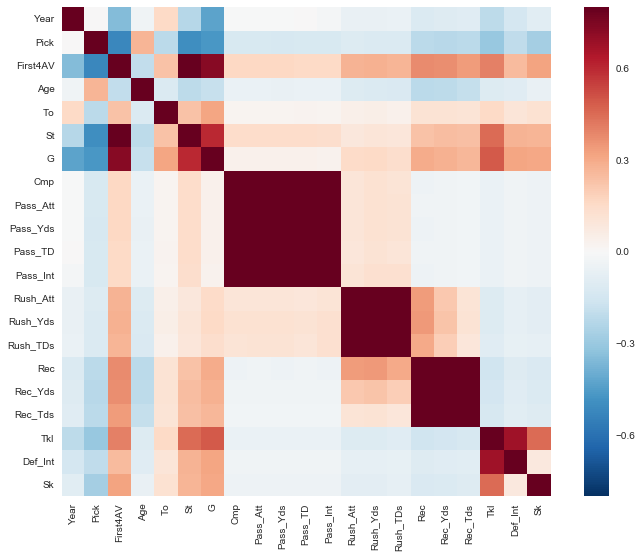

In [135]:
# Make the correlation matrix.
corrmat = df_young.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [136]:
df_young_mod = df_young

In [137]:
df_young_mod['Cmp'] = (df_young_mod['Cmp'] - df_young_mod['Cmp'].mean()) / df_young_mod['Cmp'].std()

In [138]:
df_young_mod['Pass_Att'] = (df_young_mod['Pass_Att'] - df_young_mod['Pass_Att'].mean()) / df_young_mod['Pass_Att'].std()

In [139]:
df_young_mod['Pass_Yds'] = (df_young_mod['Pass_Yds'] - df_young_mod['Pass_Yds'].mean()) / df_young_mod['Pass_Yds'].std()

In [140]:
df_young_mod['Pass_TD'] = (df_young_mod['Pass_TD'] - df_young_mod['Pass_TD'].mean()) / df_young_mod['Pass_TD'].std()

In [141]:
df_young_mod['Pass_Int'] = (df_young_mod['Pass_Int'] - df_young_mod['Pass_Int'].mean()) / df_young_mod['Pass_Int'].std()

In [142]:
df_young_mod['QBR'] = 0.20*(df_young_mod['Cmp'] + df_young_mod['Pass_Att'] + df_young_mod['Pass_Yds'] + df_young_mod['Pass_TD'] - df_young_mod['Pass_Int'])
df_young_mod['QBR'].unique()

array([ 5.40390898,  4.94522957, -0.0661565 , -0.02508491,  0.09181271,
       -0.06424457, -0.10996424,  1.65980988,  7.90992787,  1.19045593,
        4.81696368,  9.96018035,  0.71460167, -0.05664167,  0.02066842,
       -0.030824  ,  0.77678152,  1.47898616,  2.68560577,  3.61409379,
        3.7598133 , -0.13075666, -0.0114733 ,  0.06108883,  0.38200446,
       -0.06233264, -0.04842375, -0.01680796, -0.05720321, -0.10848484])

In [143]:
df_young_mod['years_played'] = df_young_mod['To'] - df_young_mod['Year'] + 1
df_young_mod['years_played'].unique()

array([ 2.,  1.,  3.,  4.])

In [144]:
df_young_mod = df_young_mod.drop(['Year', 'To', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int'], axis=1)

                  Pick  First4AV       Age        St         G  Rush_Att  \
Pick          1.000000 -0.520278  0.269110 -0.496792 -0.466093 -0.111349   
First4AV     -0.520278  1.000000 -0.195501  0.827274  0.727464  0.275110   
Age           0.269110 -0.195501  1.000000 -0.208985 -0.184708 -0.111811   
St           -0.496792  0.827274 -0.208985  1.000000  0.605121  0.090930   
G            -0.466093  0.727464 -0.184708  0.605121  1.000000  0.154040   
Rush_Att     -0.111349  0.275110 -0.111811  0.090930  0.154040  1.000000   
Rush_Yds     -0.116488  0.286429 -0.117781  0.101398  0.157313  0.993765   
Rush_TDs     -0.117057  0.271460 -0.124983  0.094966  0.142376  0.928557   
Rec          -0.218354  0.381118 -0.217113  0.234860  0.298921  0.338612   
Rec_Yds      -0.221807  0.374309 -0.210531  0.246129  0.281342  0.216878   
Rec_Tds      -0.216947  0.341087 -0.193318  0.243241  0.265969  0.106904   
Tkl          -0.304299  0.403828 -0.112055  0.455810  0.488173 -0.109265   
Def_Int     

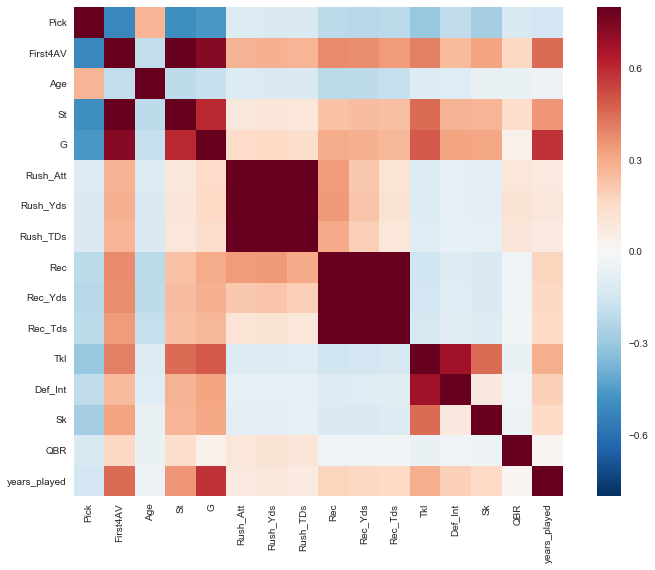

In [145]:
# Make the correlation matrix.
corrmat = df_young_mod.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [146]:
# AV contribution for running backs:

df_young_mod['Rush_Att'] = (df_young_mod['Rush_Att'] - df_young_mod['Rush_Att'].mean()) / df_young_mod['Rush_Att'].std()

In [147]:
df_young_mod['Rush_Yds'] = (df_young_mod['Rush_Yds'] - df_young_mod['Rush_Yds'].mean()) / df_young_mod['Rush_Yds'].std()

In [148]:
df_young_mod['Rush_TDs'] = (df_young_mod['Rush_TDs'] - df_young_mod['Rush_TDs'].mean()) / df_young_mod['Rush_TDs'].std()

In [149]:
df_young_mod['RBR'] = (1.0/3.0)*(df_young_mod['Rush_Att'] + df_young_mod['Rush_Yds'] + df_young_mod['Rush_TDs'])

In [150]:
# AV contribution for pass catchers:

df_young_mod['Rec'] = (df_young_mod['Rec'] - df_young_mod['Rec'].mean()) / df_young_mod['Rec'].std()

In [151]:
df_young_mod['Rec_Yds'] = (df_young_mod['Rec_Yds'] - df_young_mod['Rec_Yds'].mean()) / df_young_mod['Rec_Yds'].std()

In [152]:
df_young_mod['Rec_Tds'] = (df_young_mod['Rec_Tds'] - df_young_mod['Rec_Tds'].mean()) / df_young_mod['Rec_Tds'].std()

In [153]:
df_young_mod['ReceiverR'] = (1.0/3.0)*(df_young_mod['Rec'] + df_young_mod['Rec_Yds'] + df_young_mod['Rec_Tds'])

In [154]:
# AV contribution for defenders:

df_young_mod['Tkl'] = (df_young_mod['Tkl'] - df_young_mod['Tkl'].mean()) / df_young_mod['Tkl'].std()

In [155]:
df_young_mod['Def_Int'] = (df_young_mod['Def_Int'] - df_young_mod['Def_Int'].mean()) / df_young_mod['Def_Int'].std()

In [156]:
df_young_mod['Sk'] = (df_young_mod['Sk'] - df_young_mod['Sk'].mean()) / df_young_mod['Sk'].std()

In [157]:
df_young_mod['DefR'] = (1.0/3.0)*(df_young_mod['Tkl'] + df_young_mod['Def_Int'] + df_young_mod['Sk'])

# df_young_mod['DefR'] = (1.0/2.0)*(df_young_mod['Tkl'] + df_young_mod['Def_Int'])

In [158]:
# eliminate superfluous columns

df_young_mod = df_young_mod.drop(['Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec_Yds', 'Rec', 'Rec_Tds', 'Tkl', 'Def_Int'], axis=1)

In [159]:
print(df_young_mod.columns) # look!  'Sk' is a column;  why is it not in the heat map?

Index(['Pick', 'Tm', 'Position Standard', 'First4AV', 'Age', 'St', 'G', 'Sk',
       'College/Univ', 'QBR', 'years_played', 'RBR', 'ReceiverR', 'DefR'],
      dtype='object')


In [160]:
# eliminate superfluous columns -- these gave errors before!

# df_young_mod = df_young_mod.drop(['Tm', 'Position Standard', 'College/Univ', 'Sk'], axis=1) <-- CAUSES ERROR

df_young_mod = df_young_mod.drop(['Tm', 'Position Standard', 'College/Univ'], axis=1)

In [161]:
df_young_mod = df_young_mod.drop(['Sk'], axis=1)

print(df_young_mod.columns)

Index(['Pick', 'First4AV', 'Age', 'St', 'G', 'QBR', 'years_played', 'RBR',
       'ReceiverR', 'DefR'],
      dtype='object')


In [162]:
df_young_mod = df_young_mod.drop(['St', 'G'], axis=1)

print(df_young_mod.columns)

Index(['Pick', 'First4AV', 'Age', 'QBR', 'years_played', 'RBR', 'ReceiverR',
       'DefR'],
      dtype='object')


In [163]:
df_young_mod.head()  #  Still have an 'Sk' column -- but 'Sk' isn't in the heat map below.  WHY?!?

,Pick,First4AV,Age,QBR,years_played,RBR,ReceiverR,DefR
0,1,13,21.0,5.403909,2.0,1.469594,-0.317681,-0.392461
1,2,9,21.0,4.945230,2.0,1.229797,-0.173029,-0.392461
2,3,0,21.0,-0.066156,2.0,-0.226509,-0.317681,0.001464
3,4,9,21.0,-0.066156,2.0,-0.216402,3.238900,-0.392461
4,5,7,23.0,-0.066156,2.0,-0.226509,-0.317681,-0.392461


In [164]:
print(df_young_mod)

     Pick  First4AV   Age       QBR  years_played       RBR  ReceiverR  \
0       1        13  21.0  5.403909           2.0  1.469594  -0.317681   
1       2         9  21.0  4.945230           2.0  1.229797  -0.173029   
2       3         0  21.0 -0.066156           2.0 -0.226509  -0.317681   
3       4         9  21.0 -0.066156           2.0 -0.216402   3.238900   
4       5         7  23.0 -0.066156           2.0 -0.226509  -0.317681   
5       6         9  21.0 -0.066156           2.0 -0.226509  -0.317681   
6       7         0  23.0 -0.066156           2.0 -0.212641  -0.015576   
7       8         7  23.0 -0.066156           2.0 -0.226509  -0.317681   
8       9         9  21.0 -0.066156           2.0 -0.226509  -0.316801   
9      10         8  21.0 -0.066156           2.0  5.372546   0.377325   
10     11         1  23.0 -0.066156           2.0 -0.226509  -0.317681   
11     12         6  22.0 -0.066156           2.0 -0.226509  -0.317681   
12     13         6  21.0 -0.066156   

                  Pick  First4AV       Age       QBR  years_played       RBR  \
Pick          1.000000 -0.520278  0.269110 -0.129492     -0.149744 -0.116782   
First4AV     -0.520278  1.000000 -0.195501  0.163610      0.453485  0.282055   
Age           0.269110 -0.195501  1.000000 -0.054597     -0.044935 -0.120060   
QBR          -0.129492  0.163610 -0.054597  1.000000      0.012592  0.108085   
years_played -0.149744  0.453485 -0.044935  0.012592      1.000000  0.081670   
RBR          -0.116782  0.282055 -0.120060  0.108085      0.081670  1.000000   
ReceiverR    -0.223414  0.372812 -0.211125 -0.033160      0.170427  0.224658   
DefR         -0.335030  0.420772 -0.113925 -0.053897      0.275978 -0.110555   

              ReceiverR      DefR  
Pick          -0.223414 -0.335030  
First4AV       0.372812  0.420772  
Age           -0.211125 -0.113925  
QBR           -0.033160 -0.053897  
years_played   0.170427  0.275978  
RBR            0.224658 -0.110555  
ReceiverR      1.000000 -0.

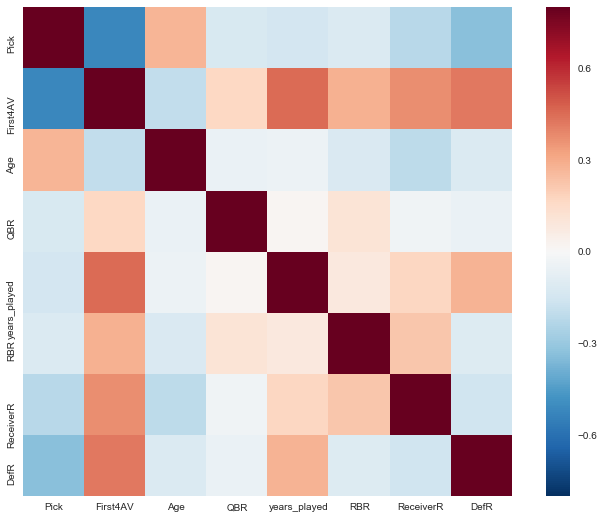

In [165]:
# Make the correlation matrix.
corrmat = df_young_mod.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

In [166]:
df_young_mod['Pick'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [167]:
df_young_mod['First4AV'].unique()

array([13,  9,  0,  7,  8,  1,  6,  3,  5, 11,  2,  4, 12, 19, 17, 21, 16,
       10, 24, 31, 22, 14, 18, 15, -1, 20, 27, 32, 26, 28, 30, 33])

In [168]:
df_young_mod['Age'].unique()

array([ 21.,  23.,  22.,  24.,  20.,  25.,  26.])

In [169]:
X = StandardScaler().fit_transform(df_young_mod)

In [170]:
sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929  0.12411412  0.09528647  0.08978253
  0.05637103  0.03467889]


In [171]:
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929  0.12411412  0.09528647  0.08978253
  0.05637103]


In [172]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929  0.12411412  0.09528647  0.08978253]


In [173]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929  0.12411412  0.09528647]


In [174]:

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929  0.12411412]


In [175]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799  0.13101929]


In [176]:
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.29929968  0.16944799]
